In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)

In [3]:
train=pd.read_csv('train.csv')
train

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.000000,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.000000,100.000000,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.000000,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.000000,144.000000,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.000000,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.000000,121.000000,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.000000,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.000000,121.000000,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.000000,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.000000,121.000000,1369,4
5,ID_ec05b1a7b,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.000000,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,38,121,1444,16,121,4,1.777778,1.000000,121.000000,1444,4
6,ID_e9e0c1100,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,2,0.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.000000,0,1,0,0,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,8,4,64,16,121,4,1.777778,1.000000,121.000000,64,4
7,ID_3e04e571e,130000.0,1,2,0,1,1,0,Na

In [4]:
train['Target'].value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

In [5]:
train.shape

(9557, 143)

In [6]:
work=train

In [7]:
#code for number of null values in a column
for i in list(work.columns):
    count=0
    for j in  list(work[i].isnull()):
        if j is True:
            count=count+1
    if count != 0:
        print(i,'-',count)

v2a1 - 6860
v18q1 - 7342
rez_esc - 7928
meaneduc - 5
SQBmeaned - 5


In [8]:
work.loc[((work['v2a1'].isnull()) & (work['Target']==1) ),'v2a1']=work['v2a1'].where(work['Target']==1).dropna().median()
work.loc[((work['v2a1'].isnull()) & (work['Target']==2) ),'v2a1']=work['v2a1'].where(work['Target']==2).dropna().median()
work.loc[((work['v2a1'].isnull()) & (work['Target']==3) ),'v2a1']=work['v2a1'].where(work['Target']==3).dropna().median()
work.loc[((work['v2a1'].isnull()) & (work['Target']==4) ),'v2a1']=work['v2a1'].where(work['Target']==4).dropna().median()

In [9]:
work.loc[((work['v18q1'].isnull()) & (work['v18q']==0)),'v18q1']=0

In [10]:
ID=work['Id']


In [11]:
monthly_rent_payment=work['v2a1']


In [12]:
bathrooms=work['rooms']-work['bedrooms']
bedrooms=work['bedrooms']


In [13]:
refrigerator=work['refrig']


In [14]:
no_of_tablets=work['v18q1']


In [15]:
males_younger_12=work['r4h1']
males_older_12=work['r4h2']
female_younger_12=work['r4m1']
female_older_12=work['r4m2']


In [16]:
household_size=work['hhsize']


In [17]:
years_of_schooling=work['escolari']


In [18]:
material_outside_wall=work['paredblolad']+2*work['paredzocalo']+3*work['paredpreb']+4*work['pareddes']+5*work['paredmad']+6*work['paredzinc']+7*work['paredfibras']+8*work['paredother']


In [19]:
floor_material=work['pisomoscer']+2*work['pisocemento']+3*work['pisoother']+4*work['pisonatur']+5*work['pisonotiene']+6*work['pisomadera']


In [20]:
roof_material=work['techozinc']+2*work['techoentrepiso']+3*work['techocane']+4*work['techootro']


In [21]:
water_provision=work['abastaguano']+2*work['abastaguadentro']+3*work['abastaguafuera']


In [22]:
electricity=work['public']+2*work['planpri']+3*work['noelec']+4*work['coopele']


In [23]:
toilet=work['sanitario1']+2*work['sanitario2']+3*work['sanitario3']+4*work['sanitario5']+5*work['sanitario6']


In [24]:
cooking_energy=work['energcocinar1']+2*work['energcocinar2']+3*work['energcocinar3']+4*work['energcocinar4']


In [25]:
rubbish_disposal=work['elimbasu1']+2*work['elimbasu2']+3*work['elimbasu3']+4*work['elimbasu4']+5*work['elimbasu5']+6*work['elimbasu6']


In [26]:
condition_walls=work['epared1']+2*work['epared2']+3*work['epared3']
condition_floor=work['etecho1']+2*work['etecho2']+3*work['etecho3']
condition_roof=work['eviv1']+2*work['eviv2']+3*work['eviv3']

In [27]:
disable_person=work['dis']


In [28]:
gender=work['male']+2*work['female']


In [29]:
marital_status=work['estadocivil1']+2*work['estadocivil2']+3*work['estadocivil3']+4*work['estadocivil4']+5*work['estadocivil5']+6*work['estadocivil6']+7*work['estadocivil7']
in_house_position=work['parentesco1']+2*work['parentesco2']+3*work['parentesco3']+4*work['parentesco4']+5*work['parentesco5']+6*work['parentesco6']+7*work['parentesco7']+8*work['parentesco8']+9*work['parentesco9']+10*work['parentesco10']+11*work['parentesco11']+12*work['parentesco12']


In [30]:
Household_level_identifier=work['idhogar']


In [31]:
children_0_to_19=work['hogar_nin']
adult_below_65=work['hogar_adul']-work['hogar_mayor']
adult_above_65=work['hogar_mayor']

In [32]:
work.loc[(work['dependency']=='yes'), 'dependency']=1
work.loc[(work['dependency']=='no'), 'dependency']=0
dependency=work['dependency']


In [33]:
work.loc[(work['edjefe']=='no'),'edjefe']=0
work.loc[(work['edjefe']=='yes'),'edjefe']=1
work.loc[(work['edjefa']=='no'),'edjefa']=0
work.loc[(work['edjefa']=='yes'),'edjefa']=1

edu_male_head_years=work['edjefe']
edu_female_head_years=work['edjefa']


In [34]:
edu_avg_above_18=work['meaneduc']


In [35]:
education_level=work['instlevel1']+2*work['instlevel2']+3*work['instlevel3']+4*work['instlevel4']+5*work['instlevel6']+6*work['instlevel7']+7*work['instlevel7']+8*work['instlevel8']+9*work['instlevel9']

In [36]:
overcrowding=work['overcrowding']

In [37]:
house_owned_status=work['tipovivi1']+2*work['tipovivi2']+3*work['tipovivi3']+4*work['tipovivi4']+5*work['tipovivi5']

In [38]:
computer=work['computer']

In [39]:
television=work['television']

In [40]:
mobilephone=work['mobilephone']

In [41]:
no_of_mobile_phone=work['qmobilephone']

In [42]:
region=work['lugar1']+2*work['lugar2']+3*work['lugar3']+4*work['lugar4']+5*work['lugar5']+6*work['lugar6']

In [43]:
area=work['area1']+2*work['area2']


In [44]:
age=work['age']

In [45]:
about_person=['ID','age','years_of_schooling','disable_person','gender','marital_status','in_house_position','education_level']
about_household=['region','area','house_owned_status','monthly_rent_payment','bedrooms','bathrooms','condition_roof','condition_floor','condition_walls','material_outside_wall','floor_material','roof_material','water_provision','electricity','toilet','cooking_energy','rubbish_disposal']
gadget_in_household=['refrigerator','no_of_tablets','computer','television','mobilephone','no_of_mobile_phone']
household_composition=['Household_level_identifier','household_size','males_younger_12','males_older_12','female_younger_12','female_older_12','children_0_to_19','adult_below_65','adult_above_65']
education_level_in_house=['edu_male_head_years','edu_female_head_years','edu_avg_above_18']
household_stats=['overcrowding','dependency']

In [46]:
final=pd.DataFrame({ 'ID':ID, 'age':age, 'years_of_schooling':years_of_schooling, 'disable_person':disable_person, 'gender':gender, 'marital_status':marital_status, 'in_house_position':in_house_position, 'education_level':education_level, 'region':region, 'area':area, 'house_owned_status':house_owned_status, 'monthly_rent_payment':monthly_rent_payment, 'bedrooms':bedrooms, 'bathrooms':bathrooms, 'condition_roof':condition_roof, 'condition_floor':condition_floor, 'condition_walls':condition_walls, 'material_outside_wall':material_outside_wall, 'floor_material':floor_material, 'roof_material':roof_material, 'water_provision':water_provision, 'electricity':electricity, 'toilet':toilet, 'cooking_energy':cooking_energy, 'rubbish_disposal':rubbish_disposal, 'Household_level_identifier':Household_level_identifier, 'household_size':household_size, 'males_younger_12':males_younger_12, 'males_older_12':males_older_12, 'female_younger_12':female_younger_12, 'female_older_12':female_older_12, 'children_0_to_19':children_0_to_19, 'adult_below_65':adult_below_65, 'adult_above_65':adult_above_65, 'edu_male_head_years':edu_male_head_years, 'edu_female_head_years':edu_female_head_years, 'edu_avg_above_18':edu_avg_above_18, 'refrigerator':refrigerator, 'no_of_tablets':no_of_tablets, 'computer':computer, 'television':television, 'mobilephone':mobilephone, 'no_of_mobile_phone':no_of_mobile_phone, 'overcrowding':overcrowding, 'dependency':dependency})

In [47]:
final['Target']=work['Target']

In [48]:
final

,ID,age,years_of_schooling,disable_person,gender,marital_status,in_house_position,education_level,region,area,house_owned_status,monthly_rent_payment,bedrooms,bathrooms,condition_roof,condition_floor,condition_walls,material_outside_wall,floor_material,roof_material,water_provision,electricity,toilet,cooking_energy,rubbish_disposal,Household_level_identifier,household_size,males_younger_12,males_older_12,female_younger_12,female_older_12,children_0_to_19,adult_below_65,adult_above_65,edu_male_head_years,edu_female_head_years,edu_avg_above_18,refrigerator,no_of_tablets,computer,television,mobilephone,no_of_mobile_phone,overcrowding,dependency,Target
0,ID_279628684,43,10,0,1,4,1,4,1,1,3,190000.0,1,2,1,1,2,1,1,2,2,1,2,3,1,21eb7fcc1,1,0,1,0,0,0,1,0,10,0,10.000000,1,0.0,0,0,1,1,1.000000,0,4
1,ID_f29eb3ddd,67,12,0,1,4,1,8,1,1,3,135000.0,1,3,2,2,2,5,6,1,2,1,2,2,1,0e5d7a658,1,0,1,0,0,0,0,1,12,0,12.000000,1,1.0,0,0,1,1,1.000000,8,4
2,ID_68de51c94,92,11,1,2,6,1,0,1,1,1,150000.0,2,6,3,3,2,5,1,1,2,1,2,2,1,2c7317ea8,1,0,0,0,1,0,0,1,0,11,11.000000,1,0.0,0,0,0,0,0.500000,8,4
3,ID_d671db89c,17,9,0,1,7,3,4,1,1,3,180000.0,3,2,3,3,3,1,1,1,2,1,2,2,1,2b58d945f,4,0,2,1,1,2,2,0,11,0,11.000000,1,1.0,0,0,1,3,1.333333,1,4
4,ID_d56d6f5f5,37,11,0,2,2,2,0,1,1,3,180000.0,3,2,3,3,3,1,1,1,2,1,2,2,1,2b58d945f,4,0,2,1,1,2,2,0,11,0,11.000000,1,1.0,0,0,1,3,1.333333,1,4
5,ID_ec05b1a7b,38,11,0,1,2,1,0,1,1,3,180000.0,3,2,3,3,3,1,1,1,2,1,2,2,1,2b58d945f,4,0,2,1,1,2,2,0,11,0,11.000000,1,1.0,0,0,1,3,1.333333,1,4
6,ID_e9e0c1100,8,2,0,2,1,3,2,1,1,3,180000.0,3,2,3,3,3,1,1,1,2,1,2,2,1,2b58d945f,4,0,2,1,1,2,2,0,11,0,11.000000,1,1.0,0,0,1,3,1.333333,1,4
7,ID_3e04e571e,7,0,0,2,1,3,1,1,1,3,130000.0,1,1,2,1,1,1,1,1,2,1,2,3,1,d6dae86b7,4,0,1,2,1,2,2,0,9,0,10.000000,1,0.0,0,0,1,1,4.000000,1,4
8,ID_1284f8aad,30,9,0,1,2,1,4,1,1,3,130000.0,1,1,2,1,1,1,1,1,2,1,2,3,1,d6dae86b7,4,0,1,2,1,2,2,0,9,0,10.000000,1,0.0,0,0,1,1,4.000000,1,4
9,ID_51f52fdd2,28,11,0,2,2,2,0,1,1,3,130000.0,1,1,2,1,1,1,1,1,2,1,2,3,1,d6dae86b7,4,0,1,2,1,2,2,0,9,0,10.000000,1,0.0,0,0,1,1,4.000000,1,4


In [49]:
final.shape

(9557, 46)

In [50]:
#code for number of null values in a column
for i in list(final.columns):
    count=0
    for j in  list(final[i].isnull()):
        if j is True:
            count=count+1
    if count != 0:
        print(i,'-',count)

edu_avg_above_18 - 5


In [51]:
final.loc[(final['edu_avg_above_18'].isnull() ),['ID','age','gender','household_size','Household_level_identifier','education_level','edu_male_head_years','edu_female_head_years','edu_avg_above_18','Target']]

,ID,age,gender,household_size,Household_level_identifier,education_level,edu_male_head_years,edu_female_head_years,edu_avg_above_18,Target
1291,ID_bd8e11b0f,18,2,1,1b31fd159,4,0,10,NaN,4
1840,ID_46ff87316,18,2,2,a874b7ce7,3,4,0,NaN,4
1841,ID_69f50bf3e,18,1,2,a874b7ce7,2,4,0,NaN,4
2049,ID_db3168f9f,19,1,2,faaebf71a,13,12,0,NaN,4
2050,ID_2a7615902,19,1,2,faaebf71a,13,12,0,NaN,4


In [52]:
final.loc[(final['ID']=='ID_bd8e11b0f' )]=final.loc[((final['household_size']==1) & (final['Target']==4)),'edu_avg_above_18'].median()
final.loc[(final['ID']=='ID_46ff87316' )]=final.loc[((final['household_size']==2) & (final['Target']==4)),'edu_avg_above_18'].median()
final.loc[(final['ID']=='ID_69f50bf3e' )]=final.loc[((final['household_size']==2) & (final['Target']==4)),'edu_avg_above_18'].median()
final.loc[(final['ID']=='ID_db3168f9f' )]=final.loc[((final['household_size']==2) & (final['Target']==4)),'edu_avg_above_18'].median()
final.loc[(final['ID']=='ID_2a7615902' )]=final.loc[((final['household_size']==2) & (final['Target']==4)),'edu_avg_above_18'].median()


In [53]:
final.loc[[1291,1840,1841,2049,2050],'edu_avg_above_18']

1291    10.0
1840    10.0
1841    10.0
2049    10.0
2050    10.0
Name: edu_avg_above_18, dtype: float64

In [54]:
#code for number of null values in a column
for i in list(final.columns):
    count=0
    for j in  list(final[i].isnull()):
        if j is True:
            count=count+1
    if count != 0:
        print(i,'-',count)

In [55]:
final.to_csv('final.csv',index=False)

final

In [124]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Data columns (total 46 columns):
ID                            9557 non-null object
age                           9557 non-null float64
years_of_schooling            9557 non-null float64
disable_person                9557 non-null float64
gender                        9557 non-null float64
marital_status                9557 non-null float64
in_house_position             9557 non-null float64
education_level               9557 non-null float64
region                        9557 non-null float64
area                          9557 non-null float64
house_owned_status            9557 non-null float64
monthly_rent_payment          9557 non-null float64
bedrooms                      9557 non-null float64
bathrooms                     9557 non-null float64
condition_roof                9557 non-null float64
condition_floor               9557 non-null float64
condition_walls               9557 non-null float64
material_o

In [63]:
for i in range(0,len(final['Target'])):
    if final.loc[i,'Target']==10:
        final.loc[i,'Target']=4
final['Target'].value_counts()   
final.to_csv('final.csv',index=False)

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [126]:
sns.set(color_codes=True)

In [127]:
final['age'].describe()

count    9557.000000
mean       34.299152
std        21.616346
min         0.000000
25%        17.000000
50%        31.000000
75%        51.000000
max        97.000000
Name: age, dtype: float64

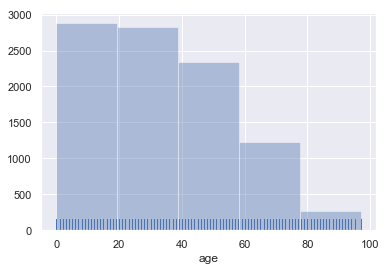

In [128]:
sns.distplot(final['age'], bins=5, kde=False, rug=True);


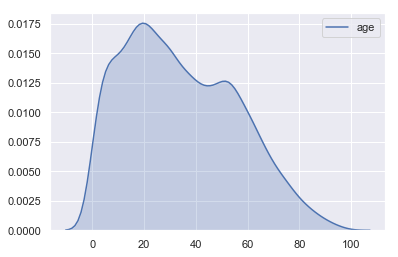

In [129]:
sns.kdeplot(final['age'], shade=True);

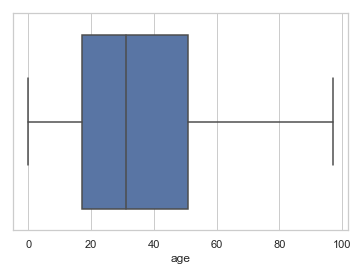

In [60]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=final['age'])

In [81]:
final['years_of_schooling'].describe()

count    9557.000000
mean        7.199958
std         4.730226
min         0.000000
25%         4.000000
50%         6.000000
75%        11.000000
max        21.000000
Name: years_of_schooling, dtype: float64

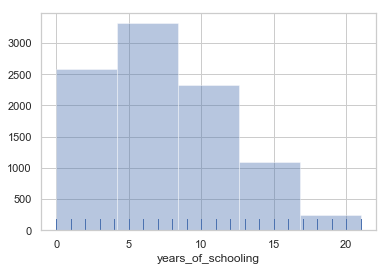

In [61]:
sns.distplot(final['years_of_schooling'], bins=5, kde=False, rug=True);

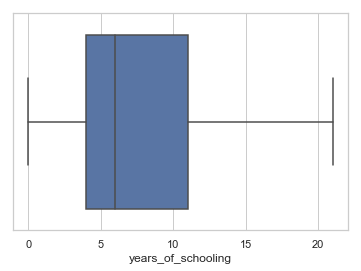

In [62]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=final['years_of_schooling'])

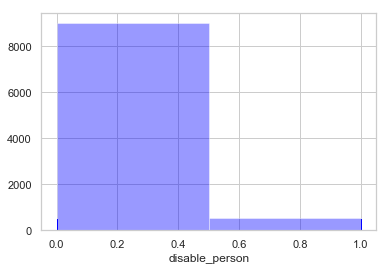

In [69]:
sns.distplot(final['disable_person'],bins=2, kde=False, rug=True,color='blue');

In [68]:
final['disable_person'].value_counts()

0    9007
1     550
Name: disable_person, dtype: int64

2    4937
1    4620
Name: gender, dtype: int64

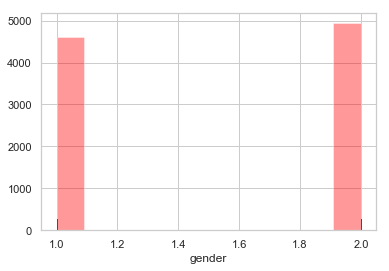

In [70]:
sns.distplot(final['gender'], kde=False, rug=True,color='red');
final['gender'].value_counts()

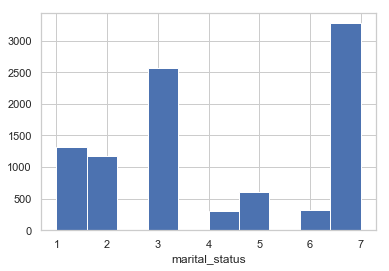

['1-less than 10 years old',
 '2-free or coupled uunion',
 '3-married',
 '4-divorced',
 '5-seperated',
 '6-widower',
 '7-single']

In [108]:
plt.hist(final['marital_status'])
plt.xlabel('marital_status')
legends=['1-less than 10 years old','2-free or coupled uunion','3-married','4-divorced','5-seperated','6-widower','7-single']
plt.show()
legends


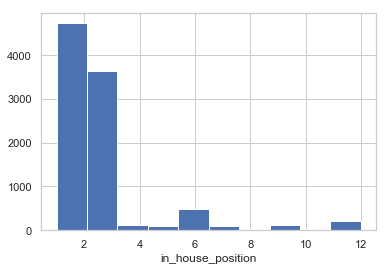

['1-household head',
 '2-spouse/partner',
 '3-son/doughter',
 '4-stepson/doughter',
 '5-son/doughter in law',
 '6-grandson/doughter',
 '7-mother/father',
 '8-father/mother in law',
 '9-brother/sister',
 '10-brother/sister in law',
 '11-other family member',
 '10-other non family member']

In [112]:
plt.hist(final['in_house_position'])
plt.xlabel('in_house_position')
legends=['1-household head','2-spouse/partner','3-son/doughter','4-stepson/doughter','5-son/doughter in law','6-grandson/doughter','7-mother/father','8-father/mother in law','9-brother/sister','10-brother/sister in law','11-other family member','10-other non family member']
plt.show()
legends

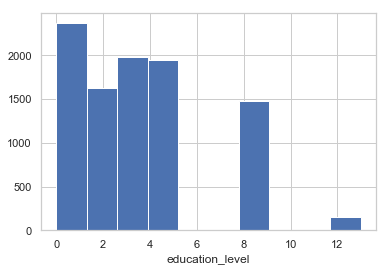

['1-no level of education',
 '2-incomplete primary',
 '3-complete primary',
 '4-incomplete academic secondary level',
 '5-complete academic secondary level',
 '6-incomplete technical secondary level',
 '7-complete technical secondary level',
 '8-undergraduate and higher education',
 '9-postgraduate higher education']

In [114]:
plt.hist(final['education_level'])
plt.xlabel('education_level')
legends=['1-no level of education','2-incomplete primary','3-complete primary','4-incomplete academic secondary level','5-complete academic secondary level','6-incomplete technical secondary level','7-complete technical secondary level','8-undergraduate and higher education','9-postgraduate higher education']
plt.show()
legends

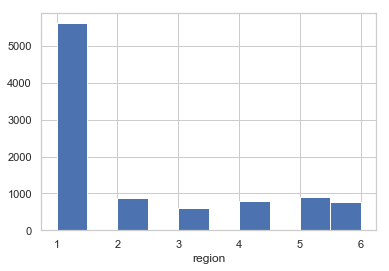

['1-region Central',
 '2-region Chorotega',
 '3-region PacÃƒÂ\xadfico central',
 '4-region Brunca',
 '5-region Huetar AtlÃƒÂ¡ntica',
 '6-region Huetar Norte']

In [115]:
plt.hist(final['region'])
plt.xlabel('region')
legends=['1-region Central','2-region Chorotega','3-region PacÃƒÂ­fico central','4-region Brunca','5-region Huetar AtlÃƒÂ¡ntica','6-region Huetar Norte']
plt.show()
legends

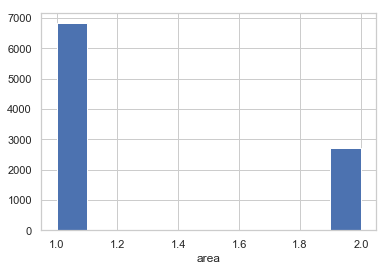

['1-zona urbana', '2-zona rural']

In [116]:
plt.hist(final['area'])
plt.xlabel('area')
legends=['1-zona urbana','2-zona rural']
plt.show()
legends

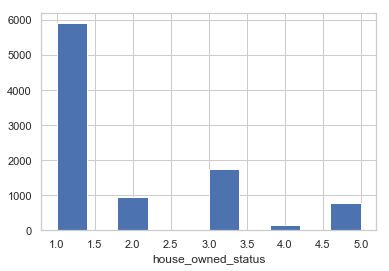

['1-own and fully paid house',
 '2-own,  paying in installments',
 '3-rented',
 '4-precarious',
 '5-other(assigned,  borrowed)']

In [117]:
plt.hist(final['house_owned_status'])
plt.xlabel('house_owned_status')
legends=['1-own and fully paid house','2-own,  paying in installments','3-rented','4-precarious','5-other(assigned,  borrowed)']
plt.show()
legends

In [119]:
final['monthly_rent_payment'].describe()

count    9.557000e+03
mean     1.362718e+05
std      8.596159e+04
min      0.000000e+00
25%      9.000000e+04
50%      1.500000e+05
75%      1.500000e+05
max      2.353477e+06
Name: monthly_rent_payment, dtype: float64

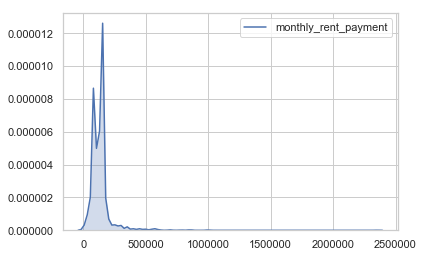

In [123]:
sns.kdeplot(final['monthly_rent_payment'], shade=True);

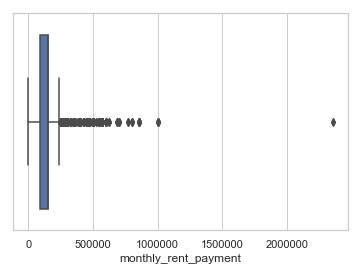

In [126]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=final['monthly_rent_payment'])

In [227]:
final['monthly_rent_payment']=final['monthly_rent_payment']/(np.max(final['monthly_rent_payment'])-np.min(final['monthly_rent_payment']))

In [247]:
whisker_max_limit=np.percentile(final['monthly_rent_payment'],75)+1.5*(np.percentile(final['monthly_rent_payment'],75)-np.percentile(final['monthly_rent_payment'],25))
whisker_max_limit

0.10197677733838062

In [248]:
final['monthly_rent_payment'].where(final['monthly_rent_payment']<=whisker_max_limit).describe()

count    9055.000000
mean        0.051731
std         0.016510
min         0.000000
25%         0.038241
50%         0.063735
75%         0.063735
max         0.101977
Name: monthly_rent_payment, dtype: float64

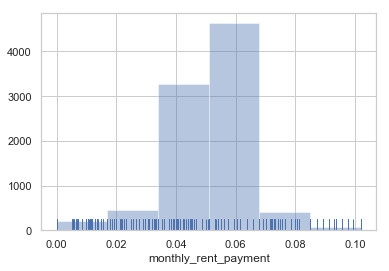

In [249]:
sns.distplot( final['monthly_rent_payment'].where(final['monthly_rent_payment']<=whisker_max_limit).dropna(),bins=6,kde=False, rug=True);

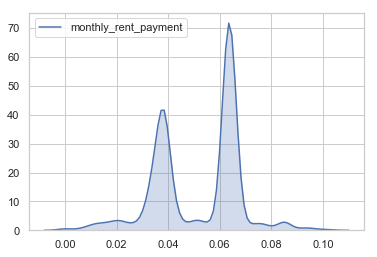

In [250]:
sns.kdeplot(final['monthly_rent_payment'].where(final['monthly_rent_payment']<=whisker_max_limit).dropna(), shade=True);

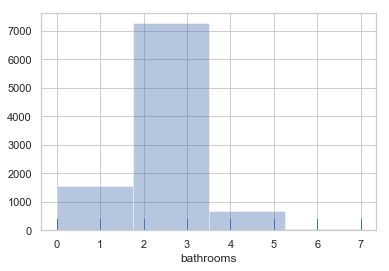

In [147]:
sns.distplot(final['bathrooms'],bins=4,kde=False, rug=True);

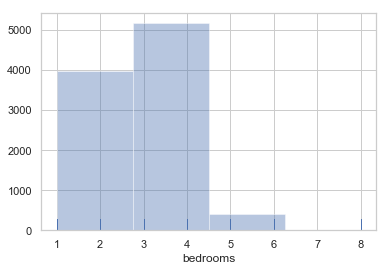

In [150]:
sns.distplot(final['bedrooms'],bins=4,kde=False, rug=True);

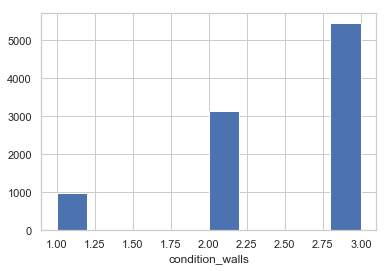

['1-walls are bad', '2-walls are regular', '3-walls are good']

In [156]:
plt.hist(final['condition_walls'])
plt.xlabel('condition_walls')
legends=['1-walls are bad','2-walls are regular','3-walls are good']
plt.show()
legends

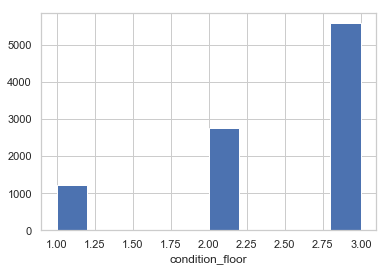

['1-floor are bad', '2-floor are regular', '3-floor are good']

In [157]:
plt.hist(final['condition_floor'])
plt.xlabel('condition_floor')
legends=['1-floor are bad','2-floor are regular','3-floor are good']
plt.show()
legends

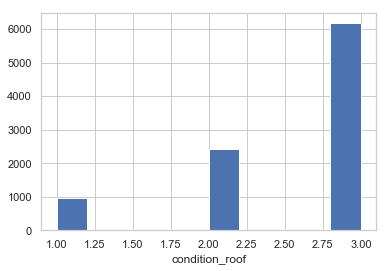

['1-roof are bad', '2-roof are regular', '3-roof are good']

In [158]:
plt.hist(final['condition_roof'])
plt.xlabel('condition_roof')
legends=['1-roof are bad','2-roof are regular','3-roof are good']
plt.show()
legends

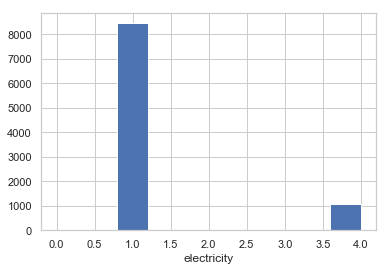

['1-electricity from CNFL,  ICE,  ESPH/JASEC',
 '2-electricity from private plant',
 '3-no electricity in the dwelling',
 '4-electricity from cooperative']

In [204]:
plt.hist(final['electricity'])
plt.xlabel('electricity')
legends=['1-electricity from CNFL,  ICE,  ESPH/JASEC','2-electricity from private plant','3-no electricity in the dwelling','4-electricity from cooperative']
plt.show()
legends

In [206]:
final['electricity'].value_counts()

1    8459
4    1059
3      21
0      15
2       3
Name: electricity, dtype: int64

In [162]:
final['household_size'].describe()

count    9557.000000
mean        3.999058
std         1.772216
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max        13.000000
Name: household_size, dtype: float64

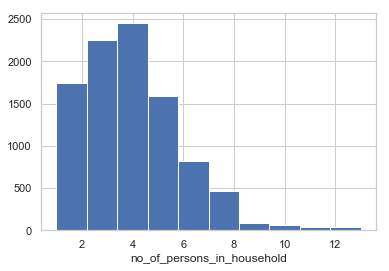

In [164]:
plt.hist(final['household_size'])
plt.xlabel('no_of_persons_in_household')
plt.show()


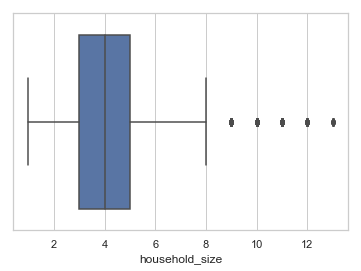

In [165]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=final['household_size'])

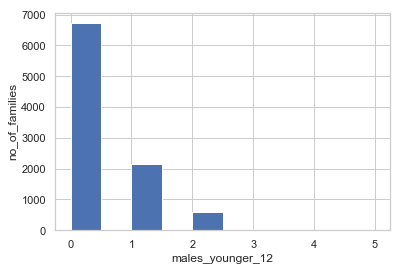

0    6718
1    2141
2     607
3      53
5      22
4      16
Name: males_younger_12, dtype: int64

In [189]:
plt.hist(final['males_younger_12'])
plt.xlabel('males_younger_12')
plt.ylabel("no_of_families")
plt.show()
final['males_younger_12'].value_counts()

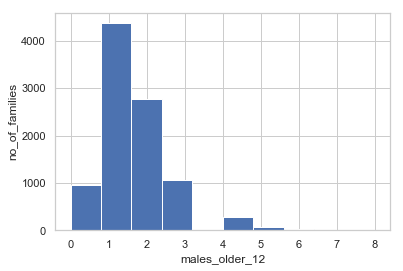

1    4370
2    2775
3    1057
0     954
4     278
5      71
6      31
7      11
8      10
Name: males_older_12, dtype: int64

In [190]:
plt.hist(final['males_older_12'])
plt.xlabel('males_older_12')
plt.ylabel("no_of_families")
plt.show()
final['males_older_12'].value_counts()

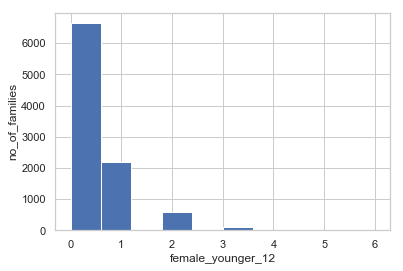

0    6638
1    2202
2     581
3     111
4      16
6       9
Name: female_younger_12, dtype: int64

In [191]:
plt.hist(final['female_younger_12'])
plt.xlabel('female_younger_12')
plt.ylabel("no_of_families")
plt.show()
final['female_younger_12'].value_counts()

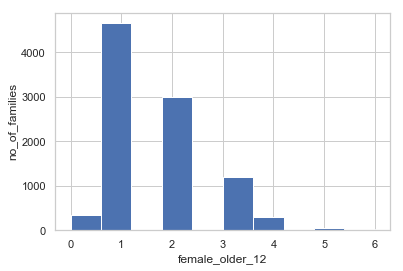

1    4651
2    2988
3    1204
0     335
4     289
5      54
6      36
Name: female_older_12, dtype: int64

In [192]:
plt.hist(final['female_older_12'])
plt.xlabel('female_older_12')
plt.ylabel("no_of_families")
plt.show()
final['female_older_12'].value_counts()

In [183]:
final['female_older_12'].value_counts()

1    4651
2    2988
3    1204
0     335
4     289
5      54
6      36
Name: female_older_12, dtype: int64

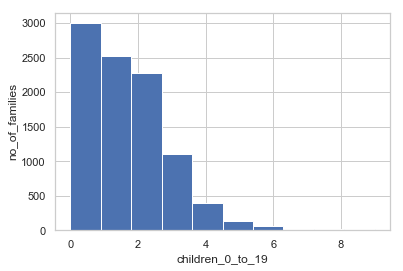

0    2997
1    2529
2    2278
3    1110
4     395
5     135
6      63
8      19
7      18
9      13
Name: children_0_to_19, dtype: int64

In [193]:
plt.hist(final['children_0_to_19'])
plt.xlabel('children_0_to_19')
plt.ylabel("no_of_families")
plt.show()
final['children_0_to_19'].value_counts()

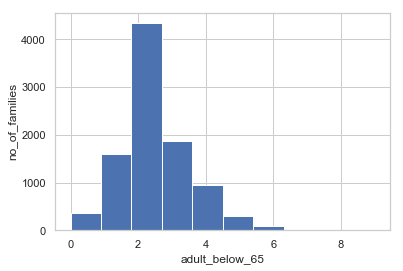

2    4334
3    1872
1    1601
4     945
0     369
5     301
6      86
7      28
9      11
8      10
Name: adult_below_65, dtype: int64

In [194]:
plt.hist(final['adult_below_65'])
plt.xlabel('adult_below_65')
plt.ylabel("no_of_families")
plt.show()
final['adult_below_65'].value_counts()

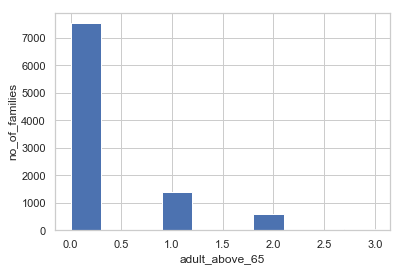

0    7529
1    1386
2     597
3      45
Name: adult_above_65, dtype: int64

In [195]:
plt.hist(final['adult_above_65'])
plt.xlabel('adult_above_65')
plt.ylabel("no_of_families")
plt.show()
final['adult_above_65'].value_counts()

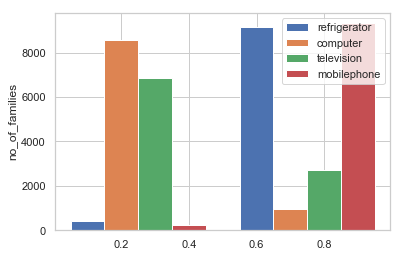

In [202]:
plt.hist([final['refrigerator'],final['computer'],final['television'],final['mobilephone']],bins=2)
plt.ylabel("no_of_families")
legends=['refrigerator','computer','television','mobilephone']
plt.legend(legends)
plt.show()


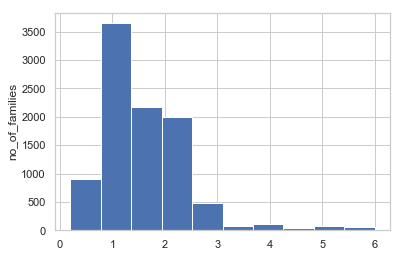

In [211]:
plt.hist(final['overcrowding'])
plt.ylabel("no_of_families")
plt.show()

In [221]:
corr_matrix=final.corr()

In [225]:
corr_matrix['adult_above_65'].sort_values(ascending=False)

adult_above_65           1.000000
age                      0.467662
disable_person           0.205976
bedrooms                 0.123557
bathrooms                0.102460
in_house_position        0.073962
males_older_12           0.063032
television               0.062247
marital_status           0.054232
roof_material            0.031588
female_older_12          0.027880
condition_roof           0.027477
refrigerator             0.024403
rubbish_disposal         0.010218
water_provision          0.008099
cooking_energy           0.007510
condition_walls          0.001337
Target                  -0.005159
gender                  -0.005445
electricity             -0.013530
material_outside_wall   -0.021471
education_level         -0.024308
area                    -0.035689
condition_floor         -0.040639
computer                -0.044713
years_of_schooling      -0.047996
monthly_rent_payment    -0.048172
no_of_tablets           -0.048894
floor_material          -0.049290
toilet        

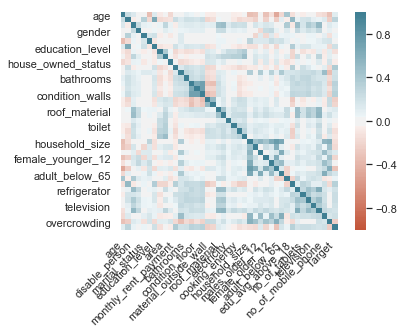

In [143]:
corr = final.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


In [133]:
final['condition_walls'].corr(final['roof_material'])

0.21872491561999677